In [1]:
from textblob import TextBlob
import pandas as pd
import re
import torch

In [2]:

torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.get_device_name(0)

/home/sam/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:104: UserWarning: 
NVIDIA GeForce RTX 3050 Ti Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 3050 Ti Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

In [27]:
df = pd.read_csv("../data/amh_datasetall .txt")
df.head()
df2 = pd.read_csv("../data/Amharic_dataset.txt")

In [26]:
len(df)

38424

In [29]:
df.columns = ["texts", "labels"]
df2.columns = ["texts", "labels"]

In [32]:
df_new = pd.concat([df2, df], ignore_index=True, )

In [34]:
len(df_new[df_new["texts"] == "ፈጣሪ ይባርካቹ"])
df_new.drop_duplicates(inplace=True)
len(df_new[df_new["texts"] == "ፈጣሪ ይባርካቹ"])

1

In [35]:
df_new[df_new["texts"] == "ፈጣሪ ይባርካቹ"]

,texts,labels
0,ፈጣሪ ይባርካቹ,positive


In [36]:
len(df_new)

28682

In [16]:
df.to_csv("../data/amahric_testdata.csv", index=False)

In [40]:
df = pd.read_csv("../data/amahric_testdata.csv")
df.tail()

,texts,labels
28677,እረ ቆሻሻውስ ያለ ቤተ መንግስት ውስጥ ያሉትን ካፅዳክ ነው,negative
28678,በነካካ እጅህ የሀገሬን ዘረኛውን የሀይማኖት ቦታ የሚያቃጠለውን በዛው ብታ...,positive
28679,መቸም ሰይጣን ብዙዎችን የጥላቻ መርዝ እያጠጣ ስንቱን ሊገለው ነው ጎበዝ ...,positive
28680,ለነገሩ ምን ታድርግ ትላልቅ ስራዎች የመስራትና መምራት አቅም የለህም አሁ...,negative
28681,ኣስመሳይ ውሸታም በጭንቅላትህ ያለ ቆሻሻ ብታፀዳ ይሻላል ነበር ድነጋይ ራ...,strongNegative


In [41]:
len(df["texts"])

28682

In [80]:
df["labels"].unique()

array(['positive', 'negative', 'neutral', nan], dtype=object)

In [54]:
# df[df["labels"] == "neutrall"]
df.loc[2693]

texts     በአማራ ክልል በ ደቡብ ወሎ አካባቢ  ከፍተኛ የሆነ ጎርፍ ብዙ ህዝቦችን ...
labels                                              neutral
Name: 2693, dtype: object

In [43]:
df["labels"] = df["labels"].str.strip()
df["labels"] = df["labels"].str.replace("strongPositive", "positive", regex=True)
df["labels"].unique()

array(['positive', 'negative', 'neutral', nan], dtype=object)

In [15]:
df[df["labels"] == "nan"]

,texts,labels


In [81]:
df["labels"].value_counts()

negative    14154
positive    10084
neutral      4440
Name: labels, dtype: int64

In [82]:
labels = df["labels"].to_list()
len(labels)

28682

In [83]:
ls = df["texts"].to_list()
len(ls)

28682

In [84]:
def remove_punc_and_special_chars(ls): 
    new_ls = []
    for text in ls:
        text = str(text)
        normalized_text = re.sub('[\!\@\#\$\%\^\«\»\&\*\(\)\…\[\]\{\}\;\“\”\›\’\‘\"\'\:\,\.\‹\/\<\>\?\\\\|\`\´\~\-\=\+\፡\።\፤\;\፦\፥\፧\፨\፠\፣]', '',text)
        new_ls.append(normalized_text)
    return new_ls

def remove_ascii_and_numbers(ls):
    new_ls = []
    for text_input in ls:
        text_input = str(text_input)
        rm_num_and_ascii=re.sub('[A-Za-z0-9]','',text_input)
        text = re.sub('[\'\u1369-\u137C\']+','',rm_num_and_ascii)
        new_ls.append(text)
    return new_ls

In [85]:
new_ls = remove_punc_and_special_chars(ls)
new_ls = remove_ascii_and_numbers(new_ls)
len(new_ls)

28682

In [86]:
def normalize_char_level_missmatch(ls):
        new_ls = []
        for input_token in ls:
                input_token = str(input_token)
                rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
                rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
                rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
                rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
                rep5=re.sub('[ሕኅ]','ህ',rep4)
                rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
                rep7=re.sub('[ሠ]','ሰ',rep6)
                rep8=re.sub('[ሡ]','ሱ',rep7)
                rep9=re.sub('[ሢ]','ሲ',rep8)
                rep10=re.sub('[ሣ]','ሳ',rep9)
                rep11=re.sub('[ሤ]','ሴ',rep10)
                rep12=re.sub('[ሥ]','ስ',rep11)
                rep13=re.sub('[ሦ]','ሶ',rep12)
                rep14=re.sub('[ዓኣዐ]','አ',rep13)
                rep15=re.sub('[ዑ]','ኡ',rep14)
                rep16=re.sub('[ዒ]','ኢ',rep15)
                rep17=re.sub('[ዔ]','ኤ',rep16)
                rep18=re.sub('[ዕ]','እ',rep17)
                rep19=re.sub('[ዖ]','ኦ',rep18)
                rep20=re.sub('[ጸ]','ፀ',rep19)
                rep21=re.sub('[ጹ]','ፁ',rep20)
                rep22=re.sub('[ጺ]','ፂ',rep21)
                rep23=re.sub('[ጻ]','ፃ',rep22)
                rep24=re.sub('[ጼ]','ፄ',rep23)
                rep25=re.sub('[ጽ]','ፅ',rep24)
                rep26=re.sub('[ጾ]','ፆ',rep25)
                #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
                rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
                rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
                rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
                rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
                rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
                rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
                rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
                rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
                rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
                rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
                rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
                rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
                rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
                rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
                rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
                rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
                rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
                rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
                rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
                rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
                rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
                rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
                new_ls.append(rep48)
        return new_ls

In [87]:
new_ls = normalize_char_level_missmatch(new_ls)
len(new_ls)

28682

In [88]:
new_ls2 = []
for text in new_ls:
    text = re.sub("[\ufeff]",'',text)
    new_ls2.append(text)
len(new_ls2)

28682

In [26]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [27]:
net.to(device)

NameError: name 'net' is not defined

In [89]:
from collections import Counter

all_text2 = ' '.join(new_ls2)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [90]:
total_words

374434

In [91]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}


In [92]:
reviews_int = []
for review in new_ls2:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
# print (reviews_int[0:3])
print(len(reviews_int))

28682


In [93]:
# encoded_labels = [1 if label =='positive' elif label == "" 0 for label in labels_split]
import numpy as np
encoded_labels = []
for label in labels:
    # if label == "strongNegative":
    #     encoded_labels.append(0)
    if label == "negative":
        encoded_labels.append(0)
    # elif label == "neutral":
    #     encoded_labels.append(1)
    else:
        encoded_labels.append(1)
    # else:
    #     encoded_labels.append(4)
encoded_labels = np.array(encoded_labels)

In [94]:
len(encoded_labels)

28682

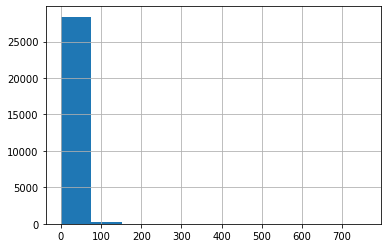

count    28682.000000
mean        13.054668
std         17.990737
min          0.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        758.000000
dtype: float64

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [96]:
len(reviews_int)

28682

In [97]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [98]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [99]:
features = pad_features(reviews_int, 20)
print (features[:10,:])

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0    64 18125]
 [    0     0     0     0     0     0     0     0     0     0  3342  2266
  32525 32526     8    33    87  4342   810  4343]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    44     1     4 18126  3343]
 [    0     0     0     0     0     0   322  1798  6901     8 32527   375
  32528  1870    25 12792   572  8153  9902  1870]
 [    0     0   331 18127  2267   138 18128   286  6902  6903 18129 18130
   4793     8 18131 18132  1594 18133  1417   159]
 [32529 32530 32531  3624 32532   136    45  1949 32533    17  6904 32534
   1418 32535 32536     1   290   513   663   109]
 [    0 12793  1082   216 18134   573  3344  6018  2924 12794   323 32537
     22 32538  3125 32539 32540  5333     5   891]
 [    0     0     0     0     0     0     0     0     0     0     0     0
    541  2736  8154  5334     1   332  1083     6]


In [100]:
split_frac = 0.8
train_x = features[0:int(split_frac*len(features))]
train_y = encoded_labels[0:int(split_frac*len(features))]
remaining_x = features[int(split_frac*len(features)):]
remaining_y = encoded_labels[int(split_frac*len(features)):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [101]:
np.array(train_x)

array([[    0,     0,     0, ...,     0,    64, 18125],
       [    0,     0,     0, ...,  4342,   810,  4343],
       [    0,     0,     0, ...,     4, 18126,  3343],
       ...,
       [    0,     0,     0, ..., 12997, 20708,  2844],
       [    0,     0,     0, ..., 16939,    38, 80926],
       [    0,     0,     0, ..., 22862,  5298,    61]])

In [102]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(np.array(train_x)), torch.from_numpy(np.array(train_y)))
valid_data = TensorDataset(torch.from_numpy(np.array(valid_x)), torch.from_numpy(np.array(valid_y)))
test_data = TensorDataset(torch.from_numpy(np.array(test_x)), torch.from_numpy(np.array(test_y)))
# dataloaders
batch_size = 32
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [103]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([32, 20])
Sample input: 
 tensor([[    0,     0,     0,     0,     0,     0,   519,     3,   572,  1281,
         56578,   187,  6633,   544,    32,   101,    21, 56579,    23, 56580],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
         53161,  2727,  3210,     1,    72, 16772, 53162,   120,  2165, 53163],
        [    0,     0, 26928,   799,  1530,   676,  6876,   904,     9, 17220,
         12244,    10,    83,   906, 30672,   285, 30673,   800,   490,   239],
        [ 2744,  1236,   310,   241,   441, 23781, 23782, 23783,   361, 23784,
          1627,  6303,   867, 23785,  6336,  3836,    17,  7393,  4861,   481],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0, 26581, 26582,   247,    52,    71, 49511],
        [    0,     0,     0,     0,     0,     0,     0,  1455,  2381,    42,
         10901,  4767,   656,   698,     1, 31436,  4579, 12614,    5

In [104]:
import torch.nn as nn

train_on_gpu = False
class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid() # for outputs more than 1 Softmax()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                        weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

In [105]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1 # 3 for our case
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(90858, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [109]:

# loss and optimization functions
lr=0.001

criterion = nn.BCELoss() # for more than one output CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
# if(train_on_gpu):
#     net.cuda()

net.train()
train_on_gpu=False
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                # if(train_on_gpu):
                #     inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/3... Step: 100... Loss: 0.062056... Val Loss: 1.785001
Epoch: 1/3... Step: 200... Loss: 0.004482... Val Loss: 1.639351
Epoch: 1/3... Step: 300... Loss: 0.004832... Val Loss: 1.598240
Epoch: 1/3... Step: 400... Loss: 0.017610... Val Loss: 1.469717
Epoch: 1/3... Step: 500... Loss: 0.006515... Val Loss: 1.287389
Epoch: 1/3... Step: 600... Loss: 0.043338... Val Loss: 1.269049
Epoch: 1/3... Step: 700... Loss: 0.002272... Val Loss: 1.403488
Epoch: 2/3... Step: 800... Loss: 0.014628... Val Loss: 1.506045
Epoch: 2/3... Step: 900... Loss: 0.000814... Val Loss: 1.574456
Epoch: 2/3... Step: 1000... Loss: 0.049310... Val Loss: 1.591256
Epoch: 2/3... Step: 1100... Loss: 0.011937... Val Loss: 1.479115
Epoch: 2/3... Step: 1200... Loss: 0.000275... Val Loss: 1.655437
Epoch: 2/3... Step: 1300... Loss: 0.005120... Val Loss: 1.347513
Epoch: 2/3... Step: 1400... Loss: 0.054998... Val Loss: 1.472010
Epoch: 3/3... Step: 1500... Loss: 0.004633... Val Loss: 1.669067
Epoch: 3/3... Step: 1600... Loss: 

In [110]:
test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    # if(train_on_gpu):
    #     inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 1.779
Test accuracy: 0.661


In [111]:
test_loader

In [112]:

from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review("ሙከራ ነው ይሄ ቢሰራ ደስ ይለኛል")
print(test_ints)


# test sequence padding
seq_length=200
features = pad_features(test_ints, seq_length)

print(features)


# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())


def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")
        


[[2312, 1, 47, 1855, 18, 1852]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 

In [117]:
test_review = 'እነዝ አማራ መጥፋት አለባቸው'
seq_length=200 
predict(net, test_review, seq_length)


Prediction value, pre-rounding: 0.000029
Negative review detected.


In [118]:
test_review = 'ሙከራ ነው ይሄ ቢሰራ ደስ ይለኛል'
seq_length=200 
predict(net, test_review, seq_length)

Prediction value, pre-rounding: 0.999973
Positive review detected!


# Naive bayes

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(new_ls2).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
unique_label = list(set(labels))
Y= []
for i in labels:
    Y.append(unique_label.index(i))

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

In [63]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.3871361338678752